# Research on Car Sales Ads
Project Report by Allentine Paulis

# Table of Contents
* [Description](#description)
* [Data](#data)
* [Step 1. Understanding Data](#understanding)
* [Step 2. Data Preprocessing](#preprocessing)
* [Step 3. Make calculations and add them to the table](#calculations)
* [Step 4. Carry out exploratory data analysis](#eda)
    * [Price](#price)
    * [Vehicle Age](#age)
    * [Average Mileage per Year](#mileage)
    * [Cylinders](#cylinders)
    * [Condition](#condition)
    * [Combine all outliers and remove the duplicates](#combineoutliers)
    * [Store Outliers Removal in Separate DataFrame](#storeoutliers)
    * [Compare Histogram](#comparehistogram)
    * [Days Listed](#dayslisted)
    * [Number of Ads](#numberads)
    * [Vehicle Types](#vehicletypes)
    * [What factors impact price the most? - Based on popular types](#factorpopular)
        * [SUV](#suv)
        * [Sedan](#sedan)
    * [What factors impact price the most? - Based on overall correlation](#factoroverall)
        * [Heatmap Correlation](#heatmap)
        * [Correlation after outliers removal](#outlierscorr)
        * [Comparison Correlation](#comparecorr)
        * [Correlation with Dummies](#corrdum)
* [Step 5. Overall conclusion](#allconclusion)

## Description <a class="anchor" id="description"></a>
This project is to prepare report for research on car sales ads at Crankshaft List. Hundreds of free advertisements for vehicles are published on the site every day.

We need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Data <a class="anchor" id="data"></a>
The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

### Step 1. Understanding Data  <a class="anchor" id="understanding"></a> / Open the data file and study the general information 

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [219]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/vehicles_us.csv")

In [220]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [222]:
length_original = len(df)
length_original

51525

In [223]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [224]:
df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [225]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [226]:
df.isnull().sum()/len(df) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [227]:
count=0
for col in df.columns:
    rows = df[col].isnull().sum()
    percent = df[col].isnull().sum()/len(df)
    if percent > 0:
        count+=1
    print(f"Column {col} has {percent:.2%} of missing values which is {rows} missing rows")
print(f"There are total {count} columns with missing values")

Column price has 0.00% of missing values which is 0 missing rows
Column model_year has 7.02% of missing values which is 3619 missing rows
Column model has 0.00% of missing values which is 0 missing rows
Column condition has 0.00% of missing values which is 0 missing rows
Column cylinders has 10.21% of missing values which is 5260 missing rows
Column fuel has 0.00% of missing values which is 0 missing rows
Column odometer has 15.32% of missing values which is 7892 missing rows
Column transmission has 0.00% of missing values which is 0 missing rows
Column type has 0.00% of missing values which is 0 missing rows
Column paint_color has 17.99% of missing values which is 9267 missing rows
Column is_4wd has 50.37% of missing values which is 25953 missing rows
Column date_posted has 0.00% of missing values which is 0 missing rows
Column days_listed has 0.00% of missing values which is 0 missing rows
There are total 5 columns with missing values


In [228]:
df.duplicated().sum()

0

In [229]:
for col in df.columns:
    df_count = df[col].value_counts()
    print(f" {col} value counts: \n {df_count} \n")

 price value counts: 
 1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64 

 model_year value counts: 
 2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64 

 model value counts: 
 ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64 

 condition value 

### Conclusion

- There are 51525 rows and 13 columns
- There are 2 integer, 4 float and 7 object dtypes
- The 13 columns are price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed
- There are no duplicated values
- Column model_year has 7.02% of missing values.
- Column cylinders has 10.21% of missing values. 
- Column odometer has 15.32% of missing values. 
- Column paint_color has 17.99% of missing values.
- Column price has 798 value of price with label 1 and at the top, need more investigation those values on the lower end. 
- There are 5 columns with missing values which are model_year, cylinders, odometer, paint_color and is_4wd.
- is_4wd data only contains True boolean values, with 25953 missing rows which are 50.37% missing values. We can't just drop 50% of the data. Since the missing values are very large which is half of the data and the data available was only True boolean, we can assumed that the missing values can be False boolean. 
- Odometer column has 185 values of 0. need to be investigate.

### Step 2. Data preprocessing <a class="anchor" id="preprocessing"></a>

- Fill is_4wd missing values with False boolean which is 0 since it's reasonable to assume that the missing values are false

In [230]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [231]:
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

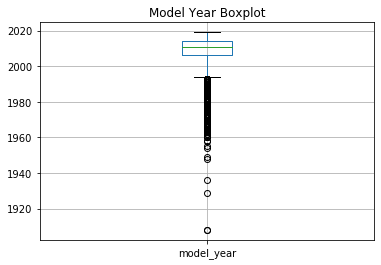

In [232]:
df.boxplot('model_year')
plt.title("Model Year Boxplot")
plt.show()

- Model_year most likely will effect the price and it has 7% missing values, so the missing values will be dropped. It also hard to fill in because some people drive 10k miles per year and others drive 100k per year. We can still fill it assuming that model_year correlated to model and odometer as the model defines the usage type of a car and the mileage is quite a reliable predictor for its age. However since the missing values is less than 10%, we will drop it.

In [233]:
df = df.dropna(subset=['model_year'])

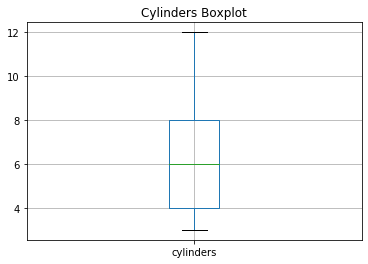

In [234]:
df.boxplot("cylinders")
plt.title("Cylinders Boxplot")
plt.show()

In [235]:
df.groupby(['model', 'model_year'])['cylinders'].median()

model              model_year
acura tl           1999.0        6.0
                   2001.0        6.0
                   2002.0        6.0
                   2003.0        6.0
                   2004.0        6.0
                                ... 
volkswagen passat  2014.0        4.0
                   2015.0        4.0
                   2016.0        4.0
                   2017.0        4.0
                   2018.0        4.0
Name: cylinders, Length: 2226, dtype: float64

In [236]:
df['cylinders'].fillna(df.groupby(['model', 'model_year'])['cylinders'].transform(np.median), 
                             inplace=True)

- Assuming number of cylinders correlate with model and model of year, we group cylinders by model and model year and fill the missing values with its median

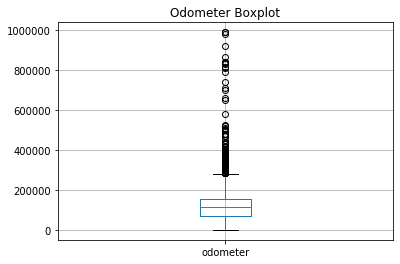

In [237]:
df.boxplot("odometer")
plt.title("Odometer Boxplot")
plt.show()

In [238]:
df.groupby(['model', 'model_year'])['odometer'].median()

model              model_year
acura tl           1999.0        196000.0
                   2001.0        177770.0
                   2002.0        189200.0
                   2003.0        142500.0
                   2004.0        183000.0
                                   ...   
volkswagen passat  2014.0         74931.0
                   2015.0         69000.0
                   2016.0         41000.0
                   2017.0         31755.0
                   2018.0         32637.0
Name: odometer, Length: 2226, dtype: float64

In [239]:
df['odometer'].fillna(df.groupby(['model', 'model_year'])['odometer'].transform(np.median), 
                            inplace=True)

- Assuming odometer correlate with model and model of year, we group odometer by model and model year  as the model defines the usage type of a car and the mileage is quite a reliable predictor for its age. Then we fill the missing values with its median. 

In [240]:
df.loc[df['odometer']== 0]['condition'].value_counts()

good         95
excellent    67
fair          6
like new      4
salvage       2
Name: condition, dtype: int64

In [241]:
len(df[df['odometer']== 0])/length_original*100

0.33770014556040756

- There are odometer with 0 values which is 0.33% but not brand new car. It might be errors. need more information or investigation why it's errors, there is possibilty that the customers can tamper the odometer as well. Since it's very small value, I will leave it for now.

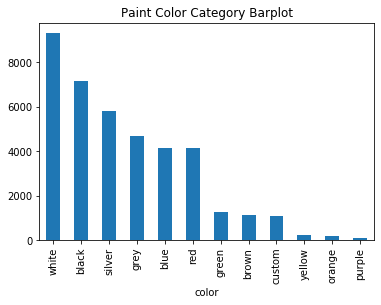

In [242]:
df["paint_color"].value_counts().plot(kind='bar')
plt.title("Paint Color Category Barplot")
plt.xlabel('color')
plt.show()

In [243]:
df["paint_color"].value_counts()/len(df["paint_color"])*100

white     19.463115
black     14.979335
silver    12.130005
grey       9.781656
blue       8.648186
red        8.637749
green      2.667724
brown      2.337912
custom     2.241890
yellow     0.498894
orange     0.432096
purple     0.198305
Name: paint_color, dtype: float64

- At first I want to fill paint_color missing values with the most frequent value (Mode) which is white color. However paint_color missing values are 18% which will be the second top. This observation can't be ignored since the data was not large enough and has pretty large 18% missing values. Another suggestion is to put unknown values or others or not avaiable values while trying to get more information. 
- However from real life observation, I see so many white cars compare to another color. I google around the most popular cars and the most sold cars are also white color. For that reason, I stand to my decision that I fill the paint_color missing values with white color.

In [244]:
df.pivot_table(index='paint_color', columns='type', values='price', aggfunc='count')

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon
paint_color,,,,,,,,,,,,,
black,2069.0,2.0,66.0,445.0,121.0,111.0,21.0,34.0,884.0,1664.0,1456.0,76.0,227.0
blue,968.0,1.0,31.0,192.0,117.0,163.0,18.0,25.0,481.0,1139.0,820.0,74.0,114.0
brown,332.0,NaN,2.0,18.0,12.0,34.0,3.0,8.0,173.0,238.0,237.0,5.0,58.0
custom,287.0,NaN,8.0,20.0,11.0,18.0,5.0,5.0,38.0,276.0,297.0,30.0,79.0
green,399.0,NaN,16.0,37.0,37.0,22.0,17.0,9.0,180.0,188.0,254.0,10.0,109.0
grey,1105.0,NaN,19.0,181.0,93.0,129.0,16.0,28.0,506.0,1503.0,903.0,65.0,138.0
orange,73.0,NaN,4.0,33.0,10.0,NaN,1.0,4.0,22.0,8.0,46.0,1.0,5.0
purple,37.0,NaN,NaN,5.0,3.0,1.0,NaN,1.0,6.0,25.0,16.0,1.0,NaN
red,851.0,NaN,99.0,357.0,94.0,85.0,37.0,19.0,597.0,883.0,1003.0,26.0,87.0


- If I group the value by color and type, there seems lot of black color to be number 1 in many types of car. It doesn't match with the real life observation and google research about the most favorite and most sold car is white. For those reason, it increased the certainty that the missing values are white. 

In [245]:
# Filled by mode
df["paint_color"] = df["paint_color"].fillna(df["paint_color"].mode()[0])

In [246]:
df.isnull().sum()

price            0
model_year       0
model            0
condition        0
cylinders       26
fuel             0
odometer        76
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
dtype: int64

In [247]:
df.dropna(inplace=True)

In [248]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

- Change odometer to int64

In [249]:
df['odometer'] = df['odometer'].astype('int64')

- Change is_4wd from float to int since it's only 1 and 0 value

In [250]:
df['is_4wd'] = df['is_4wd'].astype('int64')

- Change model_year data type into int64

In [251]:
df['model_year'] = df['model_year'].astype('int64')

- Change cylinders data type into int64

In [252]:
df['cylinders'] = df['cylinders'].astype('int64')

- Change date_posted into datetime datatype

In [253]:
df['date_posted'].head(1)

0    2018-06-23
Name: date_posted, dtype: object

In [254]:
type(df['date_posted'][0])

str

In [255]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format ='%Y-%m-%dT%H:%M:%S')

In [256]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [257]:
df['model'].nunique()

99

In [258]:
def model_category(model):
    if 'chevrolet' in model:
        return 'chevrolet'
    elif 'bmw' in model:
        return 'bmw'
    elif 'toyota' in model:
        return 'toyota'
    elif 'hyundai' in model:
        return 'hyundai'
    elif 'ford' in model:
        return 'ford'
    elif 'chrysler' in model:
        return 'chrysler'
    elif 'honda' in model:
        return 'honda'
    elif 'kia' in model:
        return 'kia'
    elif 'ram' in model:
        return 'ram'
    elif 'gmc' in model:
        return 'gmc'
    elif 'jeep' in model:
        return 'jeep'
    elif 'ford' in model:
        return 'ford'
    elif 'nissan' in model:
        return 'nissan'
    elif 'subaru' in model:
        return 'subaru'
    elif 'dodge' in model:
        return 'dodge'
    elif 'acura' in model:
        return 'acura'
    elif 'volkswagen' in model:
        return 'volkswagen'
    elif 'mercedes-benz' in model:
        return 'mercedes-benz'
    elif 'cadillac' in model:
        return 'cadillac'
    elif 'ram' in model:
        return 'ram'
    elif 'buick' in model:
        return 'buick'
    else:
        return 'others'

In [259]:
# found out a simple way to get the model category by taking the first word after the strings are splitted
# df['model_category'] = df['model'].str.split().str[0]

In [260]:
df['model_category'] = df['model'].apply(model_category)

In [261]:
df['model_category'].nunique()

18

### Conclusion

- model_year missing values were dropped because it has 7% missing values.
- is_4wd missing values were filled with False boolean which is 0
- based on its charateristics, cylinders is grouped by model and model year as the model and model year can defines the number of cylinders, then the missing values were filled with median.
- odometer is grouped by model and model year as the model defines the usage type of a car and the mileage is quite a reliable predictor for its age. Then we fill the missing values with its median.
- There is 0 odometer values with various condition (not brand new) which is 0.33% 
-  paint_color missing values were filled with the most frequent value (Mode) which is white color. This observation can't be ignored since the data was not large enough and has 18% missing values, so we need to fill this missing values.
- There is no missing values left
- is_4wd is changed into numerical int data type from float type since it only has 1 and 0 values
- Date_posted is changed into datetime data type
- change the cylinder data type from float to int64
- Odometer is changed into int type since odometer in car has rounded numerical values.
- All feature columns have correct data types
- Model_category column is categorized from 99 unique values model to 18 category


### Step 3. Make calculations and add them to the table <a class="anchor" id="calculations"></a>

In [262]:
df['weekday'] = df['date_posted'].dt.weekday # 0 is Monday, 6 is Sunday
df['month'] = pd.DatetimeIndex(df['date_posted']).month
df['year'] = pd.DatetimeIndex(df['date_posted']).year

In [263]:
df['age'] = df['year'] - df['model_year']

- If the vehicle data age is 0 years, average mile per year is odometer mileage

In [264]:
df.loc[df['age']==0,'avg_mil_year'] = df.loc[df['age']==0,'odometer']

- If the data vehicle age is not 0 years, average mile per year is odometer / age 

In [265]:
df.loc[df['age']!=0, 'avg_mil_year'] = df['odometer'] / df['age']

- Change the average mileage per year data type to integer since odometer is numerical integer value not float

In [266]:
df['avg_mil_year'] = df['avg_mil_year'].astype('int64')

In [267]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_category,weekday,month,year,age,avg_mil_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,bmw,5,6,2018,7,20714
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,hyundai,3,2,2019,6,18333
3,1500,2003,ford f-150,fair,8,gas,177500,automatic,pickup,white,0,2019-03-22,9,ford,4,3,2019,16,11093
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,chrysler,1,4,2019,2,40451
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,chrysler,2,6,2018,4,14488


In [268]:
df['condition'].value_counts()

excellent    23017
good         18670
like new      4406
fair          1483
new            131
salvage        102
Name: condition, dtype: int64

In [269]:
def condition_num(x):
    if x == 'new':
        return 5
    elif x == 'like new':
        return 4
    elif x== 'excellent':
        return 3
    elif x == 'good':
        return 2
    elif x == 'fair':
        return 1
    else:
        return 0

In [270]:
df['condition'] = df['condition'].apply(condition_num)

In [271]:
df['condition'].value_counts()

3    23017
2    18670
4     4406
1     1483
5      131
0      102
Name: condition, dtype: int64

### Conclusion

- Adding weekday, month, year, age and avg_mil_year (average mileage per year) columns to the dataset
- Replacing string values in condition column with numerical scale
- Average mile per year is odometer divided by age if the age is more than 1 year.
- however when the age is less than 1 year, the average mile per year will be the odometer since we don't have information how many months the age of the car is.
- average mile per year data type is changed into int, since odometer in car usually rounded number, not float.

### Step 4. Carry out exploratory data analysis <a class="anchor" id="eda"></a>

Investigate the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. How outliers affect the form and readability of the histograms.

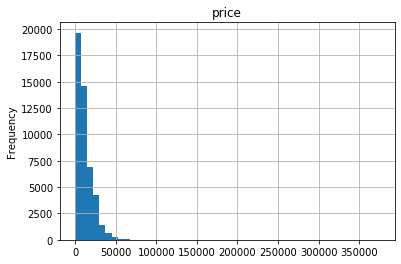

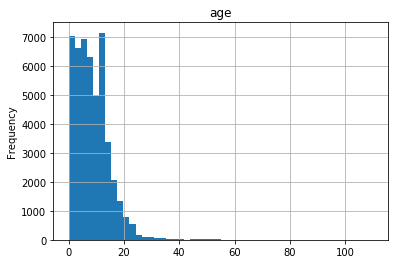

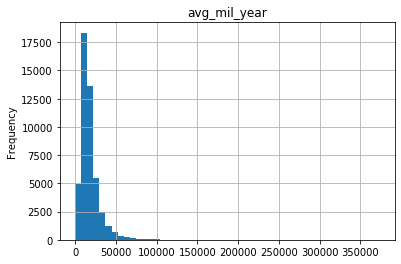

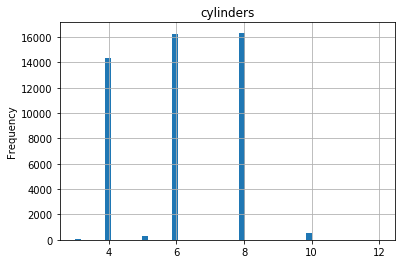

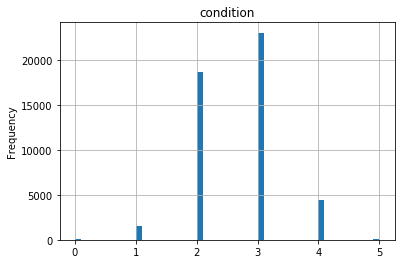

In [272]:
columns = ['price','age', 'avg_mil_year','cylinders','condition']
for col in columns:
    df[col].plot(kind='hist', bins=50, grid=True)
    plt.title(col)
    plt.show()

- From the histogram above: price, vehicle age, odometer and average mileage per year are too skewed to the left.

Before I check and remove the outliers, I want to know the correlation before the removal and after the removal to prove that there is improvement in correlation after the outliers removal

In [273]:
# Correlation before outliers removal
corr_before = df.corr()['price'].sort_values(ascending=False).drop('price')
corr_before

model_year      0.435335
is_4wd          0.319665
cylinders       0.296725
avg_mil_year    0.225565
condition       0.218952
year            0.003545
weekday        -0.001934
days_listed    -0.002245
month          -0.005381
odometer       -0.420049
age            -0.434122
Name: price, dtype: float64

#### Price <a class="anchor" id="price"></a>

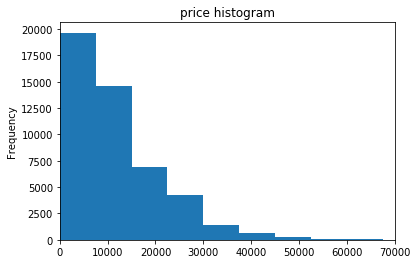

In [274]:
df['price'].plot(kind='hist', bins=50, xlim=(0,70000))
plt.title('price histogram')
plt.show()

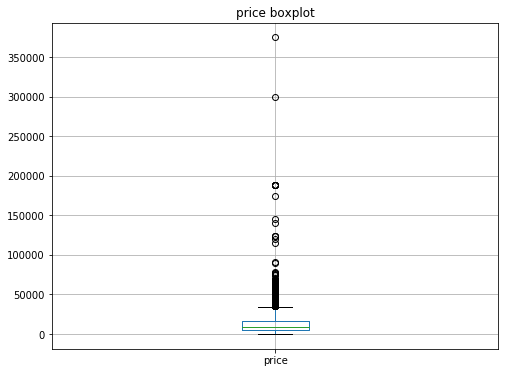

In [275]:
plt.figure(figsize=(8,6))
df.boxplot('price')
plt.title('price boxplot')
plt.show()

- Seeing the histogram and boxplot, there are clearly extreme values in top bound to be removed. The extreme values are not representative of the entire dataset so they should be removed. 

- Using IQR score to detect and remove outliers

In [276]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 5000.0
Q3 : 16900.0
IQR : 11900.0


In [277]:
price_outliers = df.loc[(df['price'] < (Q1- 1.5*IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

In [278]:
len(price_outliers)

1507

In [279]:
len(price_outliers) / len(df) * 100

3.1521261687130036

- There are 1546 price outliers which is 3% of data

#### Vehicle Age <a class="anchor" id="age"></a>

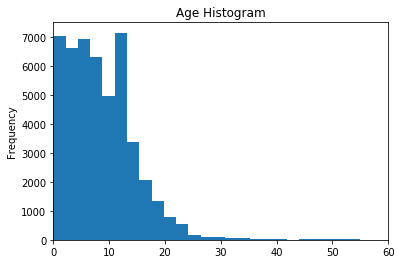

In [280]:
df['age'].plot(kind='hist',bins=50,xlim=(0,60))
plt.title('Age Histogram')
plt.show()

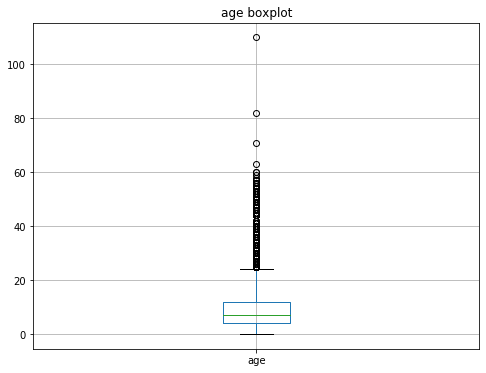

In [281]:
plt.figure(figsize=(8,6))
df.boxplot('age')
plt.title('age boxplot')
plt.show()

- Seeing the histogram and boxplot, there are clearly extreme values in top bound to be removed. The extreme cases are not representative of entire dataset so they should be removed.

- Using IQR score to remove outliers

In [282]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 4.0
Q3 : 12.0
IQR : 8.0


In [283]:
age_outliers = df.loc[(df['age'] < (Q1- 1.5*IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

In [284]:
len(age_outliers)

702

In [285]:
len(age_outliers)/len(df)*100

1.4683427806479952

- There are 737 age outliers which is 1.5% of data

#### Average Mileage per Year <a class="anchor" id="mileage"></a>

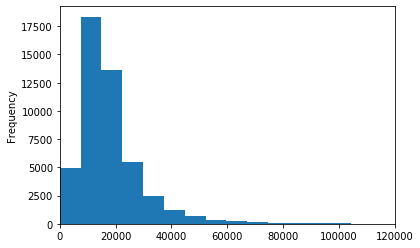

In [286]:
df['avg_mil_year'].plot(kind='hist',bins=50, xlim=(0,120000))

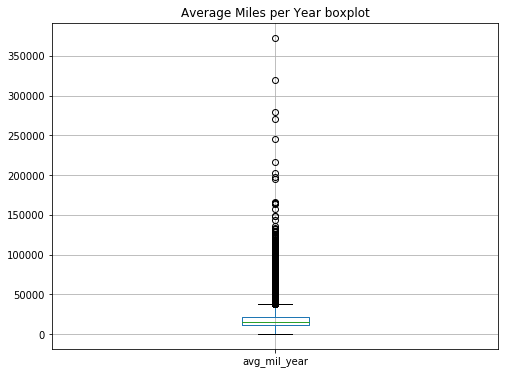

In [287]:
plt.figure(figsize=(8,6))
df.boxplot('avg_mil_year')
plt.title('Average Miles per Year boxplot')
plt.show()

- Seeing the histogram and boxplot, there are clearly extreme values in top bound to be removed. The extreme cases are not representative of entire dataset so they should be removed.

- Using IQR score to remove outliers

In [288]:
Q1 = df['avg_mil_year'].quantile(0.25)
Q3 = df['avg_mil_year'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 10875.0
Q3 : 21500.0
IQR : 10625.0


In [289]:
mil_outliers = df.loc[(df['avg_mil_year'] < (Q1- 1.5*IQR)) | (df['avg_mil_year'] > (Q3 + 1.5 * IQR))]

In [290]:
len(mil_outliers)

2923

In [291]:
len(mil_outliers) / len(df) * 100

6.113911606601268

- There are 3214 average mileage per year outliers which is 6.7% data

#### Cylinders <a class="anchor" id="cylinders"></a>

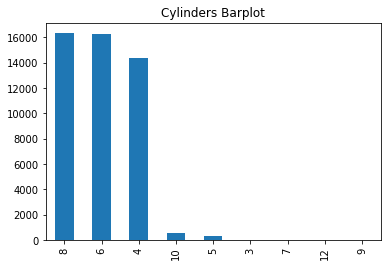

In [292]:
df['cylinders'].value_counts().plot(kind='bar')
plt.title('Cylinders Barplot')
plt.show()

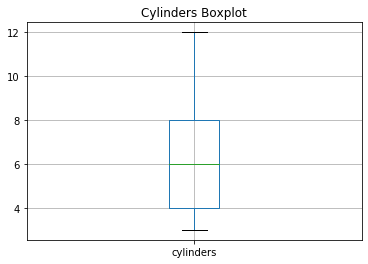

In [293]:
df.boxplot('cylinders')
plt.title('Cylinders Boxplot')
plt.show()

- Seeing the histogram and boxplot, there is no extreme outliers at number of cylinders.

In [294]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 4.0
Q3 : 8.0
IQR : 4.0


In [295]:
cylinders_outliers = df.loc[(df['cylinders'] < (Q1- 1.5*IQR)) | (df['cylinders'] > (Q3 + 1.5 * IQR))]

In [296]:
len(cylinders_outliers)

0

- It is proven that there is no outliers at cylinders.

#### Condition <a class="anchor" id="condition"></a>

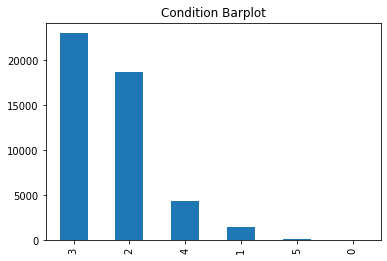

In [297]:
df['condition'].value_counts().plot(kind='bar')
plt.title('Condition Barplot')
plt.show()

- Seeing the histogram, there is no extreme outliers at number of cylinders.

In [298]:
df['condition'].mean()

2.638687276454224

In [299]:
df['condition'].median()

3.0

- There is 0.37 difference between mean and median, with range of values 0-5. There is small outliers

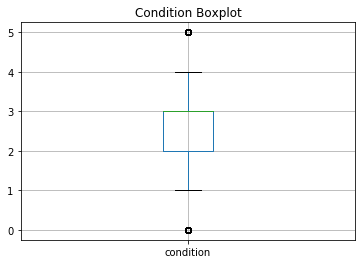

In [300]:
df.boxplot('condition')
plt.title('Condition Boxplot')
plt.show()

In [301]:
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 2.0
Q3 : 3.0
IQR : 1.0


In [302]:
condition_outliers = df.loc[(df['condition'] < (Q1- 1.5*IQR)) | (df['condition'] > (Q3 + 1.5 * IQR))]

In [303]:
len(condition_outliers)

233

In [304]:
len(condition_outliers) / len(df) * 100

0.4873559371666423

- There is 236 condition outliers which is 0.49%

#### Combine all outliers and remove the duplicates <a class="anchor" id="combineoutliers"></a>

In [305]:
all_outliers = pd.concat([price_outliers, age_outliers,mil_outliers, cylinders_outliers, condition_outliers])
len(all_outliers)

5365

In [306]:
len(all_outliers)/len(df)*100

11.221736493128908

- There are 5733 outliers rows with duplicates which is 11.97%

In [307]:
all_outliers.duplicated().sum()

393

In [308]:
all_outliers = all_outliers.drop_duplicates()

In [309]:
len(all_outliers)

4972

In [310]:
len(all_outliers)/len(df)*100

10.399715534731953

- There are 5277 rows of outliers no duplicates which is 11% data

- Create copy of dataframe with the outliers

In [311]:
outliers_df = df.copy()

#### Store Outliers Removal in Separate DataFrame <a class="anchor" id="storeoutliers"></a>

In [312]:
filter_df = df[~df.index.isin(all_outliers.index)]

In [313]:
len(filter_df)

42837

In [314]:
len(filter_df)/length_original * 100

83.13828238719069

- After data preprocessing and outliers removal, the data set becomes 83% of the original data. There are not lot of outliers, it's 11% outliers and less than 30%, this outliers removal was saved in separate dataframe.

- I drop outliers from price, there were extreme values and they were not informative and we should get rid of them, and using IQR score to detect and remove them. Extreme values are also not interpretation for the whole dataset. I also drop outliers from age, average miles per year for the same reason. I drop outliers from condition since there is 0.37 difference between its mean and median with range value 0-5 so there is small outlier. Total outliers that I drop were 11% of the original dataset, I don't think it's large enough outliers. However data with the outliers removed was saved in separate Data Frame. So we still keep the original dataset with the outliers.

- The problem with outliers is that we are not sure why they appeared in the first place, it needs more information and more investigation. There can be a wrong setting during data collection process and the data is just wrong, there might be some bug in a website where we have input fields to collect data. For example  sometimes price of a car really can be significantly higher than the average market, this can be with various factor such as expensive car repairs, uniqueness, an elite car, or simply a fraud that also happens. In this case IQR method would label such cars as outliers but in reality they are not.

- We need to talk to the business people who is responsible for data collection or data owner to figure out how the data was collected and how that outliers could appear and whether they have some meaning.

#### Compare Histograms <a class="anchor" id="comparehistogram"></a>

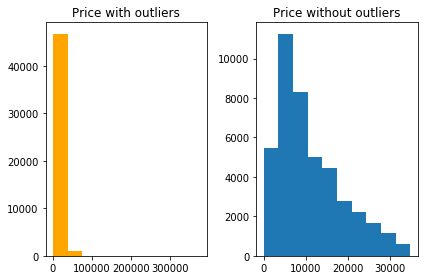

In [315]:
# Price
fig, ax = plt.subplots(1,2)
ax[0].hist(outliers_df['price'], color='orange')
ax[1].hist(filter_df['price'])

ax[0].set_title("Price with outliers")
ax[1].set_title("Price without outliers")

plt.tight_layout()
plt.show()

- With the outliers removed, the histogram becomes more distributed. It removed the extreme price values.

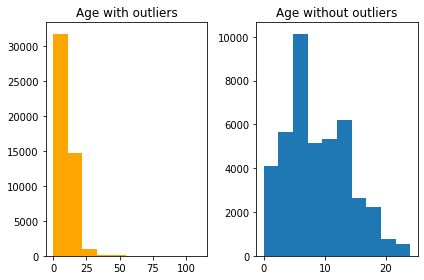

In [316]:
# Age
fig, ax = plt.subplots(1,2)
ax[0].hist(outliers_df['age'], color='orange')
ax[1].hist(filter_df['age'])

ax[0].set_title("Age with outliers")
ax[1].set_title("Age without outliers")

plt.tight_layout()
plt.show()

- The age without outliers histogram becomes more distributed. The antique car (very old) is removed so the focus is in more common vehicle age

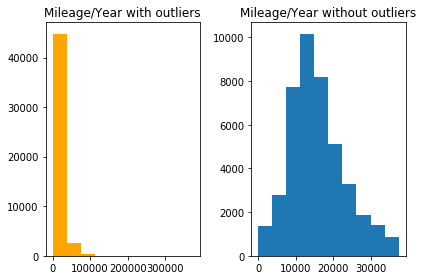

In [317]:
# Average Miles per Year
fig, ax = plt.subplots(1,2)
ax[0].hist(outliers_df['avg_mil_year'], color='orange')
ax[1].hist(filter_df['avg_mil_year'])

ax[0].set_title("Mileage/Year with outliers")
ax[1].set_title("Mileage/Year without outliers")

plt.tight_layout()
plt.show()

- The histogram with the outliers removed becomes more distributed. It removes the extreme values of average mileage per year. 

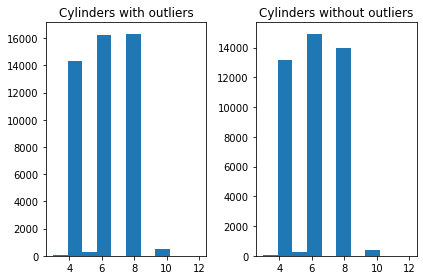

In [318]:
# Cylinders
fig, ax = plt.subplots(1,2)
ax[0].hist(outliers_df['cylinders'])
ax[1].hist(filter_df['cylinders'])

ax[0].set_title("Cylinders with outliers")
ax[1].set_title("Cylinders without outliers")

plt.tight_layout()
plt.show()

- There is no outliers for Cylinders so the histogram still the same

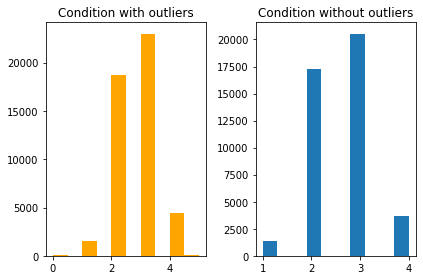

In [319]:
# Condition
fig, ax = plt.subplots(1,2)
ax[0].hist(outliers_df['condition'], color='orange')
ax[1].hist(filter_df['condition'])

ax[0].set_title("Condition with outliers")
ax[1].set_title("Condition without outliers")

plt.tight_layout()
plt.show()

- In Condition without outliers, it removed the salvage condition (0 label values) since salvage condtion doesn't represent well the car price of working condition car.

### Days listed <a class="anchor" id="dayslisted"></a>
Investigate how many days advertisement were displayed. Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

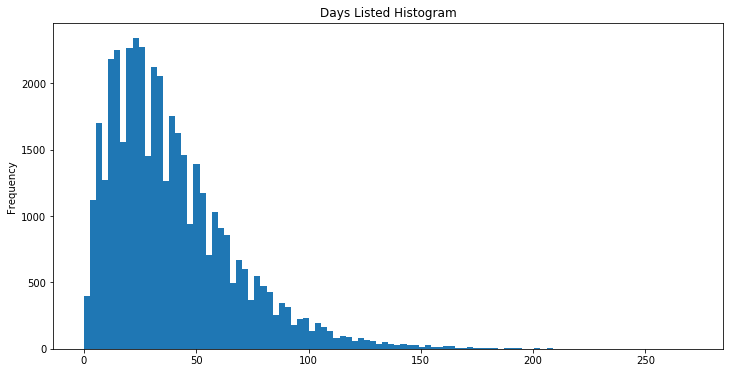

In [320]:
plt.figure(figsize=(12,6))
filter_df['days_listed'].plot(kind='hist', bins=100)
plt.title('Days Listed Histogram')
plt.show()

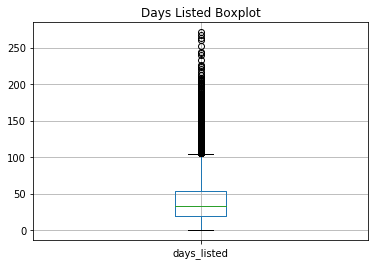

In [321]:
filter_df.boxplot('days_listed')
plt.title('Days Listed Boxplot')
plt.show()

In [322]:
filter_df['days_listed'].describe()

count    42837.000000
mean        39.551276
std         28.246222
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [323]:
filter_df['days_listed'].value_counts().sort_index().head(10)

0     42
1    144
2    210
3    339
4    366
5    413
6    510
7    578
8    609
9    610
Name: days_listed, dtype: int64

In [324]:
Q1 = filter_df['days_listed'].quantile(0.25)
Q3 = filter_df['days_listed'].quantile(0.75)
IQR = Q3 - Q1
top_cut = (Q3 + 1.5 * IQR)
print(f"IQR : {IQR}")
print(f"top cut value : {top_cut}")

IQR : 34.0
top cut value : 104.0


- The typical lifetime of ads was 39 days with median of 33 days and a quarter 19 days. 
- The maximum value is 271 days (around 9 months).  
- The fastest ads were removed quickly was 0 days which is extra fast. Even though it's possible that a car was sold in hours after the ads listed, for example there was a customer that went to see a car in person at show room couple hours after the ads were listed. 
- Using IQR score to remove outliers, the top cutoff value was 104 days so the ads were considered too long if it's more than 104 days. However it still needs more investigation and information of what effects the ads duration.

In [325]:
filter_df.pivot_table(index='model_category', values='days_listed', aggfunc='median')

,days_listed
model_category,
acura,33.5
bmw,34.0
buick,33.5
cadillac,34.0
chevrolet,33.0
chrysler,31.0
dodge,34.0
ford,33.0
gmc,34.0


In [326]:
filter_df.pivot_table(index='condition', values='days_listed', aggfunc='median')

,days_listed
condition,
1,33
2,33
3,33
4,33


In [327]:
filter_df.pivot_table(index='month', values='days_listed', aggfunc='median')

,days_listed
month,
1,33
2,34
3,34
4,34
5,33
6,34
7,33
8,33
9,33


In [328]:
filter_df.pivot_table(index='year', values='days_listed', aggfunc='median')

,days_listed
year,
2018,33.0
2019,33.5


- The patterns seem consistent for the months the ad is posted, the year posted, the model category, and condition.

In [329]:
good_days_listed = filter_df[~((filter_df['days_listed']<=0) | (filter_df['days_listed']>top_cut))]['days_listed']

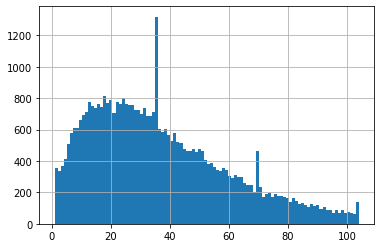

In [330]:
good_days_listed.hist(bins=100)

- The histogram above is IF the outliers were removed based on IQR score for top cutoff and also removed the 0 value since it's too fast for ads lifetime.However we should investigate the reason what is effecting the duration of the posted ads. 
Since it needs more investigation and more information, the outliers removal for the days_listed were not be applied in the dataset. 

In [331]:
filter_df.corr()['days_listed'].sort_values(ascending=False)

days_listed     1.000000
year            0.012174
odometer        0.006238
age             0.004163
is_4wd          0.002938
weekday         0.001577
condition      -0.000486
cylinders      -0.000671
avg_mil_year   -0.002804
model_year     -0.003059
price          -0.004958
month          -0.010900
Name: days_listed, dtype: float64

- If checking the correlation days_listed with other parameters, there is not enough good correlation that effect the lifetime of ads. However the year, month and the odometer has slight better correlation than other parameters. But these parameters can't determine the good correlation. So it needs more investigation and more information.

### Number of Ads <a class="anchor" id="numberads"></a>

Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [113]:
length_original

51525

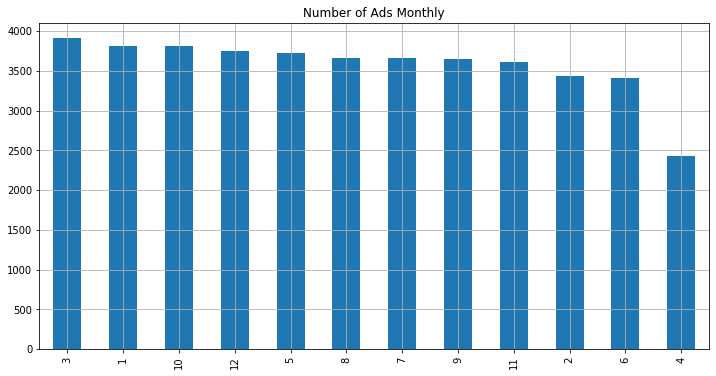

In [332]:
plt.figure(figsize=(12,6))
filter_df['month'].value_counts().plot(kind='bar', grid=True)
plt.title('Number of Ads Monthly')
plt.show()

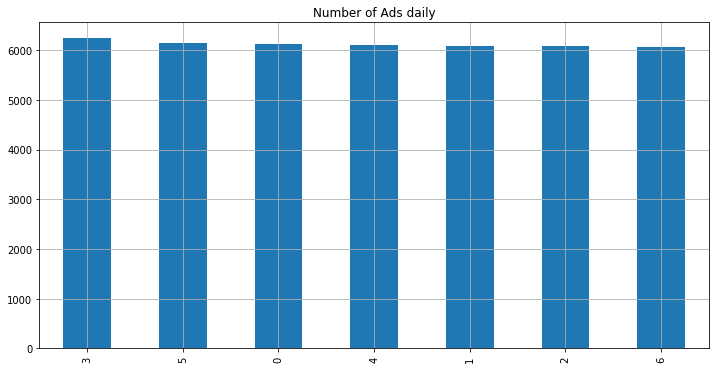

In [333]:
plt.figure(figsize=(12,6))
filter_df['weekday'].value_counts().plot(kind='bar', grid=True)
plt.title('Number of Ads daily')
plt.show()

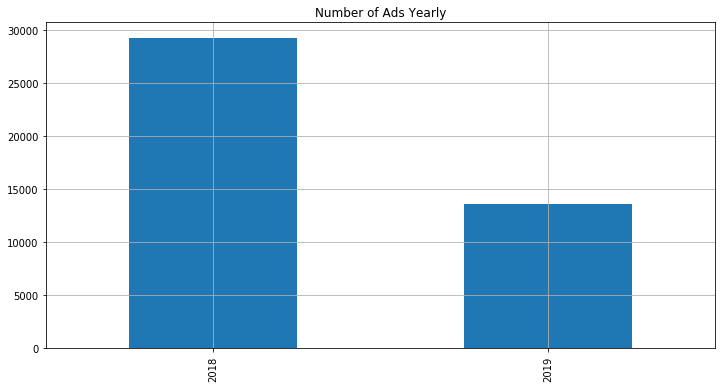

In [334]:
plt.figure(figsize=(12,6))
filter_df['year'].value_counts().plot(kind='bar', grid=True)
plt.title('Number of Ads Yearly')
plt.show()

In [335]:
filter_df['date_posted'].min()

Timestamp('2018-05-01 00:00:00')

In [336]:
filter_df['date_posted'].max()

Timestamp('2019-04-19 00:00:00')

For weekday and month of the ads posted, we have consistent number. Checking the timestamp, the dataset date range is between May 1st 2018 to April 19 2019. The month of April was not a full month, this explained why the count in month 4 was less than other months count. It also explained why year 2019 was less than year 2018 since the data in 2019 was not a full year.

### Vehicle Types  <a class="anchor" id="vehicletypes"></a>

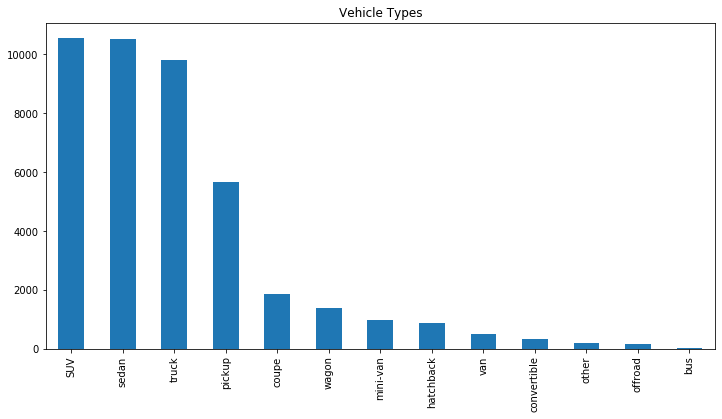

In [337]:
plt.figure(figsize=(12,6))
filter_df['type'].value_counts().plot(kind='bar')
plt.title('Vehicle Types')
plt.show()

In [338]:
filter_df['type'].value_counts()

SUV            10543
sedan          10512
truck           9799
pickup          5652
coupe           1857
wagon           1373
mini-van         984
hatchback        891
van              507
convertible      322
other            201
offroad          173
bus               23
Name: type, dtype: int64

In [339]:
filter_df['type'].value_counts()/len(df)*100

SUV            22.052333
sedan          21.987492
truck          20.496141
pickup         11.822042
coupe           3.884206
wagon           2.871844
mini-van        2.058190
hatchback       1.863666
van             1.060470
convertible     0.673513
other           0.420423
offroad         0.361857
bus             0.048108
Name: type, dtype: float64

- The top 4 type are SUV, sedan, truck and pickup which are taking 84% data. The top 2 are SUV and sedan which take 50% data. 

In [340]:
filter_df.groupby('type')['price'].mean().sort_values(ascending=False)

type
bus            17445.913043
pickup         14527.930467
truck          14467.535157
offroad        14045.473988
coupe          13258.826064
convertible    12657.627329
SUV            10119.982073
other           9676.308458
wagon           8664.828114
van             8186.938856
mini-van        7487.755081
sedan           6747.769692
hatchback       6611.048260
Name: price, dtype: float64

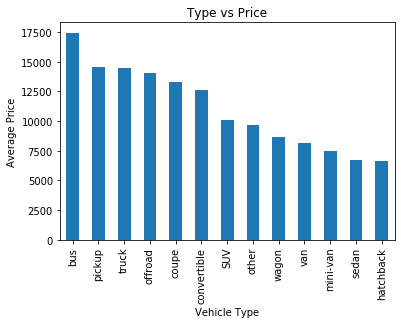

In [341]:
filter_df.groupby('type')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Type vs Price')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.show()

- Based on average price, bus, truck, pickup have the largest price.

In [342]:
filter_df.pivot_table(index='type', values='days_listed', aggfunc='median').sort_values(by='days_listed', ascending=False)

,days_listed
type,
bus,40
hatchback,36
wagon,35
SUV,34
convertible,33
coupe,33
mini-van,33
offroad,33
pickup,33


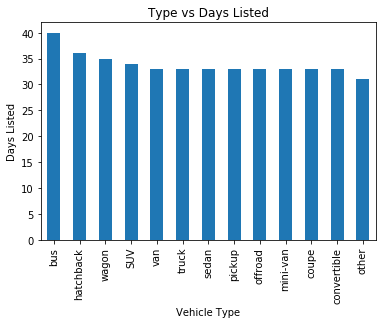

In [343]:
filter_df.groupby('type')['days_listed'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Type vs Days Listed')
plt.xlabel('Vehicle Type')
plt.ylabel('Days Listed')
plt.show()

- Bus has the highest price but also the longest ads posted. 

- The most popular ads with greatest number of ads are SUV and sedan

### What factors impact price the most? - Based on popular types  <a class="anchor" id="factorpopular"></a>

Take each of the popular types that detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

#### SUV <a class="anchor" id="suv"></a>

In [344]:
suv = filter_df.loc[df['type']=='SUV']

In [345]:
suv.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,avg_mil_year
price,1.000000,0.600754,0.265670,0.002554,-0.521486,0.117929,-0.022048,0.008054,-0.020334,0.017689,-0.598542,0.305246
model_year,0.600754,1.000000,0.327838,-0.278136,-0.651121,-0.075545,-0.014400,-0.001410,-0.036712,0.036871,-0.995623,0.576866
condition,0.265670,0.327838,1.000000,-0.101898,-0.326103,-0.011995,-0.011270,0.011195,-0.005921,0.006009,-0.326972,0.079796
cylinders,0.002554,-0.278136,-0.101898,1.000000,0.250827,0.119556,0.011370,-0.012597,0.001540,-0.004689,0.277439,-0.117643
odometer,-0.521486,-0.651121,-0.326103,0.250827,1.000000,0.025991,0.010682,0.002563,0.019856,-0.018930,0.648746,0.068634
is_4wd,0.117929,-0.075545,-0.011995,0.119556,0.025991,1.000000,-0.008213,0.015786,0.002489,-0.006210,0.074894,-0.054364
days_listed,-0.022048,-0.014400,-0.011270,0.011370,0.010682,-0.008213,1.000000,-0.005494,-0.005272,0.000819,0.014463,-0.013240
weekday,0.008054,-0.001410,0.011195,-0.012597,0.002563,0.015786,-0.005494,1.000000,0.026437,-0.023830,-0.000820,-0.003431
month,-0.020334,-0.036712,-0.005921,0.001540,0.019856,0.002489,-0.005272,0.026437,1.000000,-0.821000,-0.040102,0.096386
year,0.017689,0.036871,0.006009,-0.004689,-0.018930,-0.006210,0.000819,-0.023830,-0.821000,1.000000,0.056683,-0.118670


In [346]:
suv.corr()['price'].sort_values(ascending=False)

price           1.000000
model_year      0.600754
avg_mil_year    0.305246
condition       0.265670
is_4wd          0.117929
year            0.017689
weekday         0.008054
cylinders       0.002554
month          -0.020334
days_listed    -0.022048
odometer       -0.521486
age            -0.598542
Name: price, dtype: float64

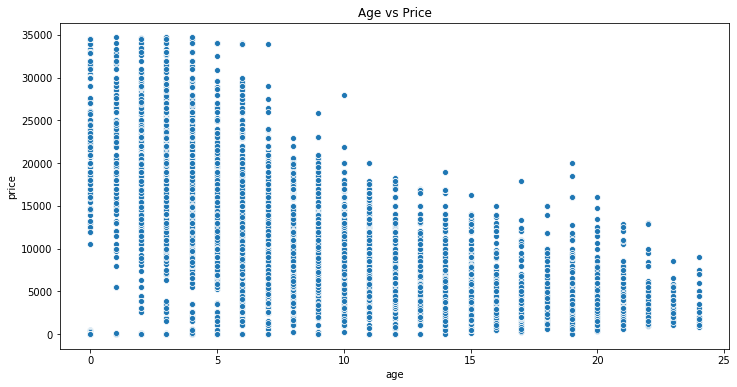

In [354]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age', y='price', data=suv)
plt.title("Age vs Price")
plt.show()

- There is negative correlation between age and price. The newest the age, the higher the price. The older vehicle has lower price.

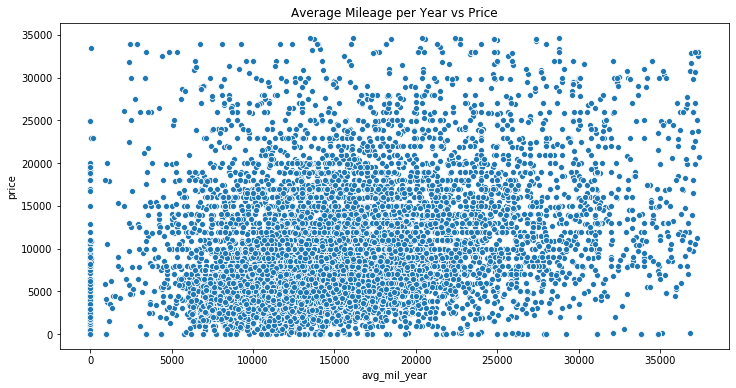

In [355]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='avg_mil_year', y='price', data=suv)
plt.title("Average Mileage per Year vs Price")
plt.show()

- There is no strong positive correlation between average mileage per year and price. 

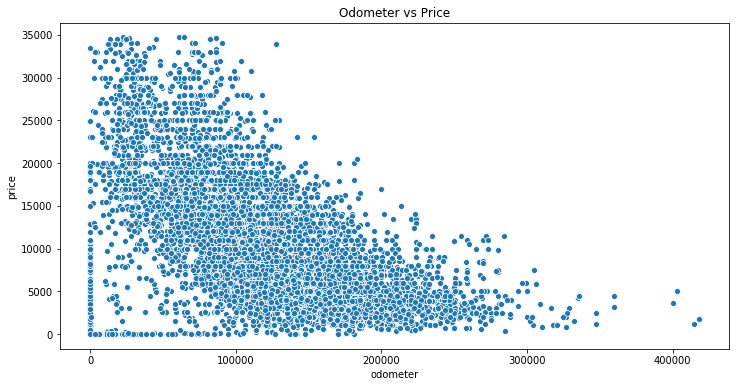

In [356]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer', y='price', data=suv)
plt.title("Odometer vs Price")
plt.show()

- However there is negative correlation between odometer and price. The higher the odometer, the lower the price.

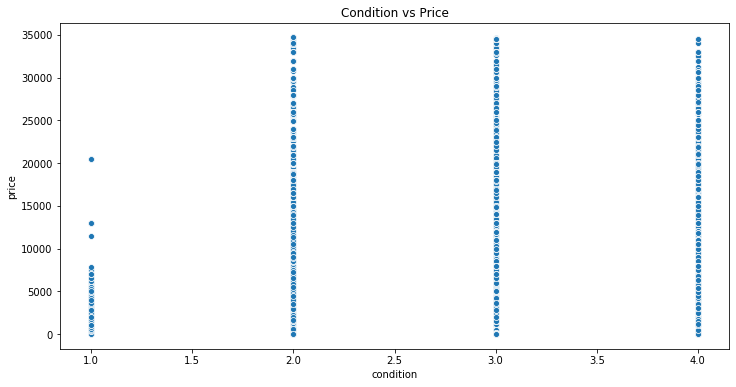

In [357]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='condition', y='price', data=suv)
plt.title("Condition vs Price")
plt.show()

- There is positive correlation between condition and price. The lower the condition, the lower the price. And the car with better condition has increased price.

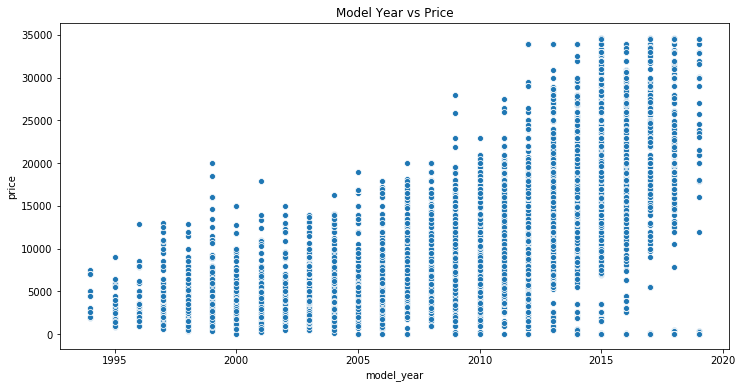

In [358]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='model_year', y='price', data=suv)
plt.title("Model Year vs Price")
plt.show()

- There is positive correlation between model_year and price. The newest model of the car has higher price than the older model year.

In [359]:
suv['transmission'].value_counts()

automatic    9988
manual        425
other         130
Name: transmission, dtype: int64

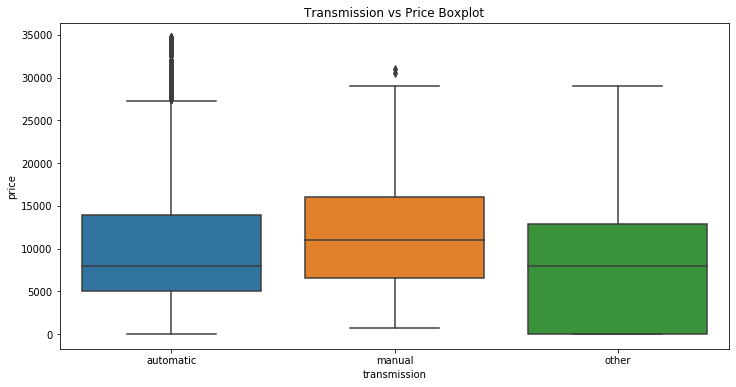

In [360]:
plt.figure(figsize=(12,6))
sns.boxplot(x='transmission', y='price', data=suv)
plt.title("Transmission vs Price Boxplot")
plt.show()

- There is no strong correlation. But Manual Transmission seems have higher price. and Other has lower price, but it was not clear what Other means, it needs more information and need more data.

In [362]:
suv['paint_color'].value_counts()

white     3522
black     1856
silver    1354
grey      1015
blue       892
red        796
green      382
brown      317
custom     271
orange      63
yellow      39
purple      36
Name: paint_color, dtype: int64

In [363]:
# Remove categories that have less than 50 which are yellow and purple
suv_paint = suv.loc[~(suv['paint_color'].isin(['yellow','purple']))]

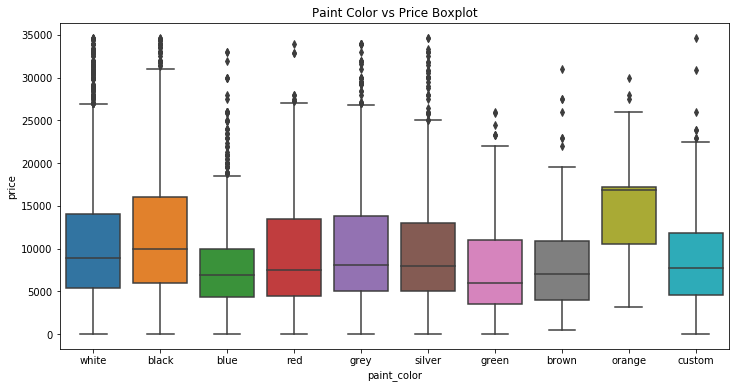

In [365]:
plt.figure(figsize=(12,6))
sns.boxplot(x='paint_color', y='price', data=suv_paint)
plt.title("Paint Color vs Price Boxplot")
plt.show()

- There is no strong correlation between paint_color and price. Orange color have a higher price, most likely because it's not common color and more special color. 

In [366]:
suv_dum = pd.get_dummies(suv, columns=['transmission', 'paint_color' ])

In [367]:
suv_dum.corr()['price'].sort_values(ascending=False)

price                     1.000000
model_year                0.600754
avg_mil_year              0.305246
condition                 0.265670
is_4wd                    0.117929
paint_color_black         0.112795
paint_color_orange        0.059050
transmission_manual       0.044209
paint_color_white         0.042376
paint_color_yellow        0.039874
year                      0.017689
weekday                   0.008054
cylinders                 0.002554
paint_color_grey          0.000773
month                    -0.020334
days_listed              -0.022048
transmission_automatic   -0.023697
paint_color_red          -0.026890
paint_color_purple       -0.030010
transmission_other       -0.030839
paint_color_silver       -0.031269
paint_color_custom       -0.037886
paint_color_brown        -0.051186
paint_color_green        -0.066297
paint_color_blue         -0.085173
odometer                 -0.521486
age                      -0.598542
Name: price, dtype: float64

- For SUV, the highest correlation with the price is model_year, age and odometer. And the most correlated paint_color is black color. 

#### Sedan<a class="anchor" id="sedan"></a>

In [368]:
sedan = filter_df.loc[df['type']=='sedan']

In [369]:
sedan.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,avg_mil_year
price,1.000000,0.641914,0.298389,-0.031121,-0.568667,0.055732,0.003154,-0.008009,-0.043007,0.039164,-0.637769,0.241796
model_year,0.641914,1.000000,0.312093,-0.124038,-0.646130,0.076009,-0.002482,0.000094,-0.049572,0.049354,-0.994738,0.517611
condition,0.298389,0.312093,1.000000,-0.051209,-0.330176,0.019077,-0.009970,-0.007412,-0.007725,0.012031,-0.310797,0.054627
cylinders,-0.031121,-0.124038,-0.051209,1.000000,0.080593,0.210076,0.001220,-0.007932,0.000600,-0.007752,0.123218,-0.072846
odometer,-0.568667,-0.646130,-0.330176,0.080593,1.000000,-0.056621,0.007740,0.005441,0.029853,-0.023011,0.643640,0.137656
is_4wd,0.055732,0.076009,0.019077,0.210076,-0.056621,1.000000,0.008369,-0.021749,0.008470,-0.003700,-0.076374,0.029429
days_listed,0.003154,-0.002482,-0.009970,0.001220,0.007740,0.008369,1.000000,0.011362,-0.008661,0.013679,0.003885,0.001619
weekday,-0.008009,0.000094,-0.007412,-0.007932,0.005441,-0.021749,0.011362,1.000000,-0.000252,-0.006069,-0.000716,0.007310
month,-0.043007,-0.049572,-0.007725,0.000600,0.029853,0.008470,-0.008661,-0.000252,1.000000,-0.822584,-0.034815,0.098898
year,0.039164,0.049354,0.012031,-0.007752,-0.023011,-0.003700,0.013679,-0.006069,-0.822584,1.000000,0.053232,-0.118234


In [370]:
sedan.corr()['price'].sort_values(ascending=False)

price           1.000000
model_year      0.641914
condition       0.298389
avg_mil_year    0.241796
is_4wd          0.055732
year            0.039164
days_listed     0.003154
weekday        -0.008009
cylinders      -0.031121
month          -0.043007
odometer       -0.568667
age            -0.637769
Name: price, dtype: float64

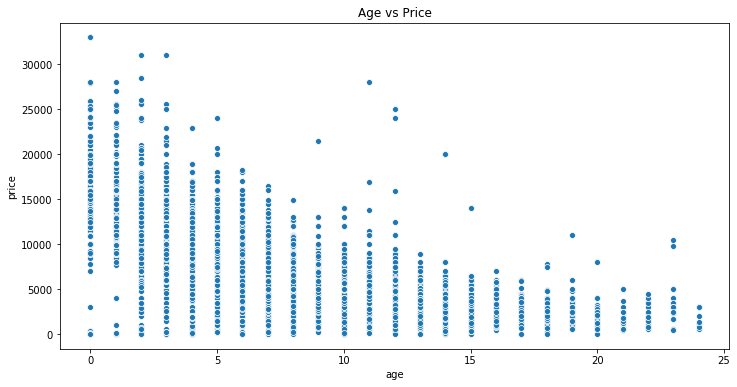

In [371]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age', y='price', data=sedan)
plt.title("Age vs Price")
plt.show()

- There is negative correlation between age and price.  The newest the age, the higher the price. The older vehicle has lower price.

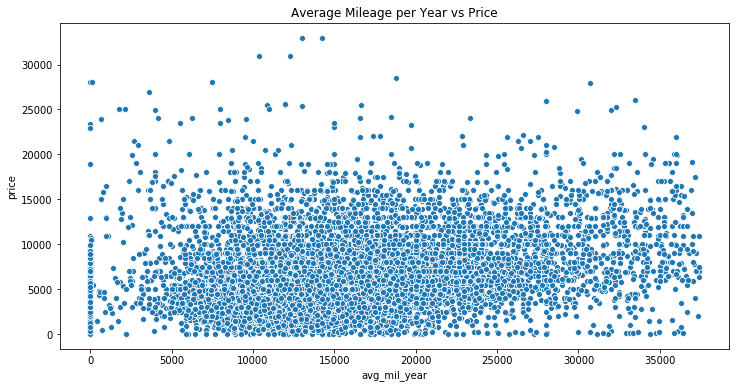

In [372]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='avg_mil_year', y='price', data=sedan)
plt.title("Average Mileage per Year vs Price")
plt.show()

- There is no strong correlation between average mileage per year and price

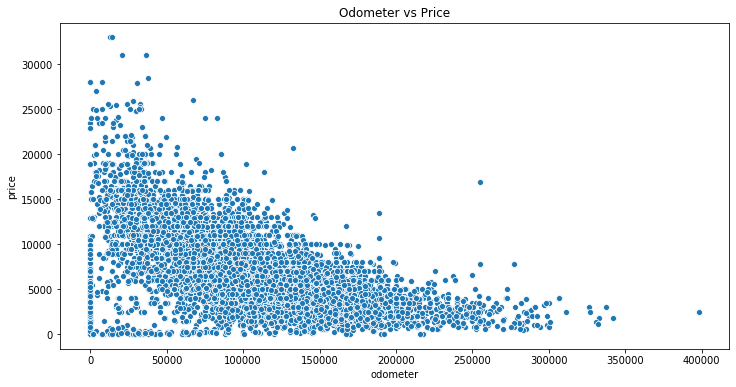

In [373]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer', y='price', data=sedan)
plt.title("Odometer vs Price")
plt.show()

- There is negative correlation between odometer and price. The higher the odometer, the lower the price.

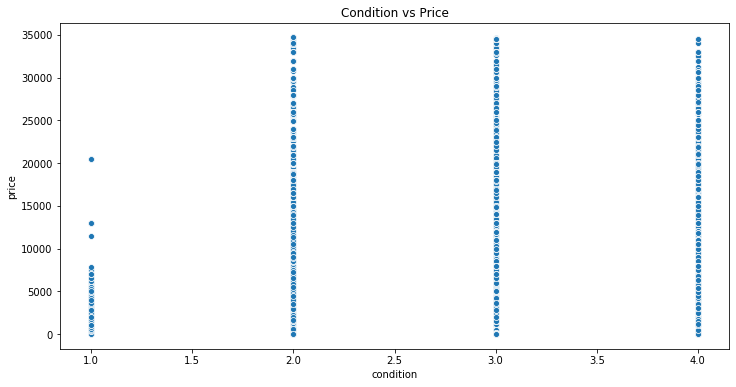

In [374]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='condition', y='price', data=suv)
plt.title("Condition vs Price")
plt.show()

- There is positive correlation between condition and price. The lower the condition, the lower the price. And the car with better condition has increased price.

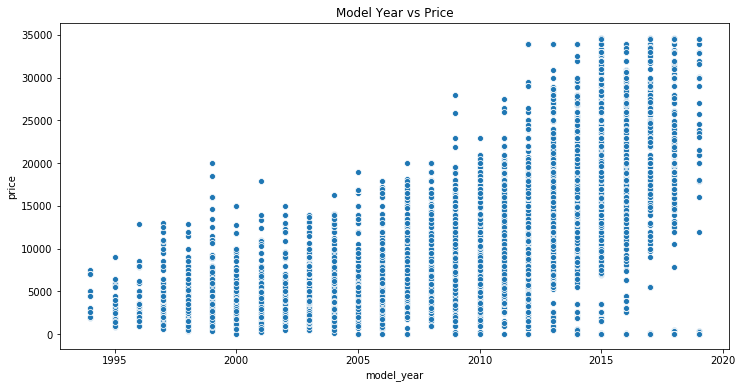

In [375]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='model_year', y='price', data=suv)
plt.title("Model Year vs Price")
plt.show()

- There is positive correlation between model_year and price. The newest model of the car has higher price than the older model year.

In [376]:
sedan['transmission'].value_counts()

automatic    9883
manual        523
other         106
Name: transmission, dtype: int64

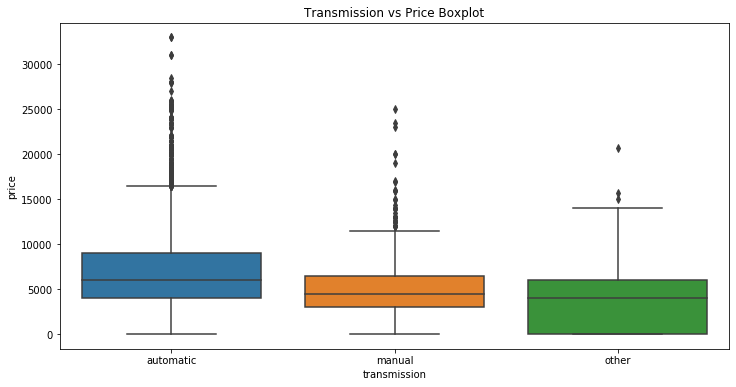

In [377]:
plt.figure(figsize=(12,6))
sns.boxplot(x='transmission', y='price', data=sedan)
plt.title("Transmission vs Price Boxplot")
plt.show()

- The Automatic has higher price than manual transmission and other. The other need more information and more investigation what is this other.

In [378]:
sedan['paint_color'].value_counts()

white     3188
silver    1774
black     1538
grey      1390
blue      1081
red        830
custom     247
brown      232
green      179
purple      25
yellow      20
orange       8
Name: paint_color, dtype: int64

In [379]:
# Remove categories that have less than 50 which are yellow, purple and orange
sedan_paint = sedan.loc[~(sedan['paint_color'].isin(['yellow','purple','orange']))]

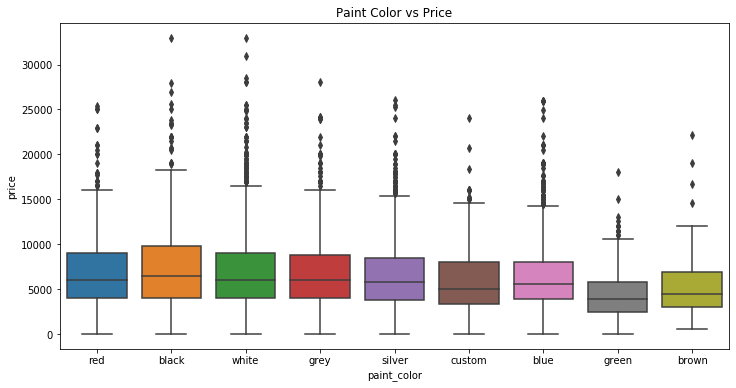

In [380]:
plt.figure(figsize=(12,6))
sns.boxplot(x='paint_color', y='price', data=sedan_paint)
plt.title('Paint Color vs Price')
plt.show()

- There is no strong correlation between price and paint_color.

In [381]:
sedan_dum = pd.get_dummies(sedan, columns=['transmission', 'paint_color' ])

In [382]:
sedan_dum.corr()['price'].sort_values(ascending=False)

price                     1.000000
model_year                0.641914
condition                 0.298389
avg_mil_year              0.241796
transmission_automatic    0.103112
is_4wd                    0.055732
paint_color_black         0.055527
year                      0.039164
paint_color_orange        0.030211
paint_color_white         0.027695
paint_color_red           0.007089
paint_color_grey          0.005819
days_listed               0.003154
weekday                  -0.008009
paint_color_purple       -0.010494
paint_color_yellow       -0.016605
paint_color_silver       -0.019883
paint_color_blue         -0.023818
paint_color_custom       -0.024706
cylinders                -0.031121
month                    -0.043007
paint_color_brown        -0.058132
transmission_other       -0.062728
paint_color_green        -0.068571
transmission_manual      -0.083654
odometer                 -0.568667
age                      -0.637769
Name: price, dtype: float64

- For Sedan, the highest correlation with the price is model_year, age and odometer. And the most correlated paint_color is black color.

### What factors impact price the most? - Based on overall correlation and get dummies correlation <a class="anchor" id="factoroverall"></a>

#### Heatmap Correlation <a class="anchor" id="heatmap"></a>

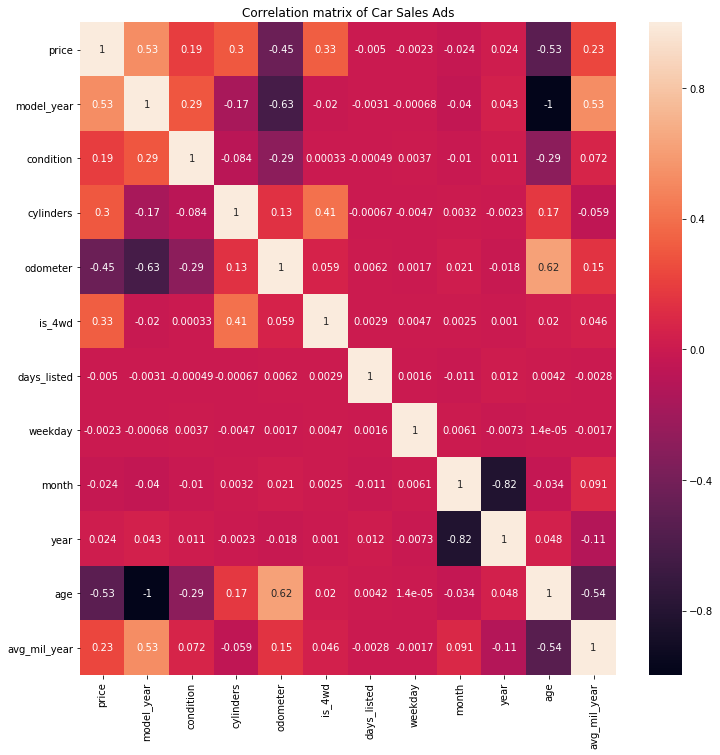

In [392]:
plt.figure(figsize=(12,12))
sns.heatmap(filter_df.corr(), annot=True)
plt.title("Correlation matrix of Car Sales Ads")
plt.show()

#### Correlation after outliers removal (without dummies) <a class="anchor" id="outlierscorr"></a>

In [386]:
corr_after = filter_df.corr()['price'].sort_values(ascending=False).drop('price')
corr_after

model_year      0.530000
is_4wd          0.328791
cylinders       0.298853
avg_mil_year    0.228482
condition       0.191284
year            0.023539
weekday        -0.002313
days_listed    -0.004958
month          -0.023620
odometer       -0.446541
age            -0.527761
Name: price, dtype: float64

#### Correlation Comparison <a class="anchor" id="comparecorr"></a>

In [387]:
# Comparison correlation before outliers removed and after outliers removed
corr_before = pd.DataFrame(corr_before)
corr_after = pd.DataFrame(corr_after)
corr_compare = pd.concat([corr_before, corr_after], axis=1)
corr_compare.columns = ['Outliers not removed', 'Outliers removed']
corr_compare

,Outliers not removed,Outliers removed
model_year,0.435335,0.530000
is_4wd,0.319665,0.328791
cylinders,0.296725,0.298853
avg_mil_year,0.225565,0.228482
condition,0.218952,0.191284
year,0.003545,0.023539
weekday,-0.001934,-0.002313
days_listed,-0.002245,-0.004958
month,-0.005381,-0.023620
odometer,-0.420049,-0.446541


For all numerical features, the most correlated to price is model_year, age and odometer.

In [388]:
# get dummies for each category
df_obj = filter_df.select_dtypes(include='object').columns
df_obj = df_obj.drop('model')

In [389]:
df_dum = pd.get_dummies(filter_df, columns=df_obj)

#### Correlation with Dummies <a class="anchor" id="corrdum"></a>

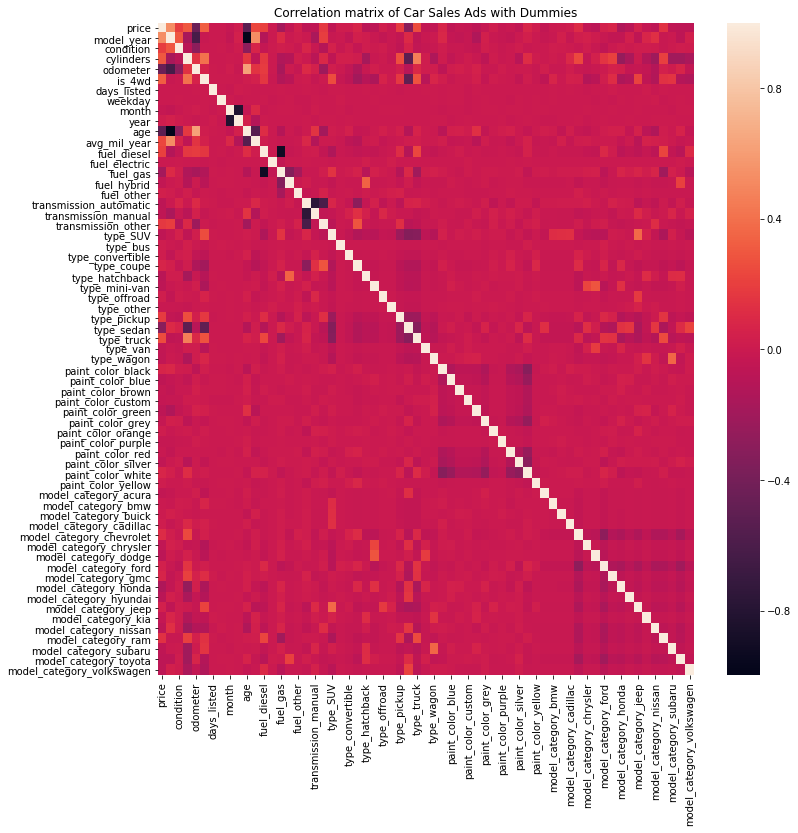

In [393]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dum.corr())
plt.title("Correlation matrix of Car Sales Ads with Dummies")
plt.show()

In [394]:
# Correlation with dummies
print(df_dum.corr()['price'].sort_values(ascending=False).drop('price'))

model_year              0.530000
is_4wd                  0.328791
cylinders               0.298853
type_truck              0.257967
avg_mil_year            0.228482
                          ...   
model_category_honda   -0.134859
fuel_gas               -0.182339
type_sedan             -0.304474
odometer               -0.446541
age                    -0.527761
Name: price, Length: 62, dtype: float64


- For all data features, the most correlated with price is model_year, age and odometer. Sedan and truck are the most correlated compare to other type. Fuel diesel and gas are the most correlated. Model category / manufacturer ram and Honda are the most correlated. 

### Conclusion
- The outliers were detected using IQR score, dropped and stored into separate dataframe. With the outliers dropped, it made the skewed left distribution histogram became more distributed normally.
- We need to talk to the business people who is responsible for data collection or data owner to figure out how the data was collected and how that outliers could appear and whether they have some meaning. 
- The typical lifetime of ads are 39 days in average, 33 days in median and a quarter of 19 days. The fastest ads to remove quickly was 0, even though it's still possible that a car was sold in hours after the ads listed. The longest ads is 271 days (around 9 months), if using IQR score to remove the outliers, the top cutoff value is 104 days and more to be considered too long listed. However it still needs more investigation what effects the duration of the ads.
- The most popular types with greatest number of ads are SUV and Sedan.
- Bus has the largest price but also the longest ads posted.
- For SUV and Sedan, the highest correlation with price are model_year, age and odometer, with the most correlated paint_color is black. 
- For all dataset features correlation, the most correlated price is model_year, age and odometer. Sedan and truck are the most correlated type. Fuel diesel and gas are the most correlated. Model category / manufacturer ram and Honda are the most correlated.


### Step 5. Overall conclusion <a class="anchor" id="allconclusion"></a>

- Removing the outliers is important to create better correlation. I compared the correlation before the outliers removed, and after I removed it, it shows increasing values of the correlation after outliers removal. For example Model year correlation is increased from 0.42 to 0.52 after outliers removed. Odometer correlation is increased from -0.38 to -0.41 after outliers removed. Age correlation is increased from -0.42 to -0.52 after outliers removed.
-  However data with the outliers removed was saved in separate Data Frame. So we still keep the original dataset with the outliers because we need more information and more investigation why the outliers occur and if they have some meaning. 
- For all correlation either with numerical and category data types, the most correlated with price are model_year, age and odometer. 
- The lower the condition, the lower the price. And the car with better condition has higher price.
- The newest model year of the car has higher price. The oldest model year of the car has lower price. It makes sense since the newest model year of the car has updated technology than the oldest model.
- The newest the age, the higher the price. The older vehicle age has lower price. The older vehicle might need more maintenance and the car technology was old. 
- There is negative correlation between odometer and price. The higher the odometer, the lower the price. It makes sense since  since the higher the odometer, the car are more used and might need more maintenance so the value is lower.
- The most popular types with greatest number of ads are SUV and Sedan. However the most correlated type are Sedan and truck. 
- Diesel and gas are the most correlated fuel with price.
- Ram and Honda are the most correlated manufacturer/ model_category.
- Black paint_color is the most correlated with price compare to other colors. This is actually in contrary with my theory in the beggining that white paint_color is the most popular car based on the google and real life observation.  
- The number of ads listing and the days listed seems consistent month by month. 
- SUV, sedan, truck and pickup are taking 84% data inventory even though there are 13 different vehicle type. It seems imbalance for other vehicle type. Maybe other types are not popular, or it's the focus of the business or need more data. 

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn